In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
bmi = df['weight'] / (df['height'] /100) ** 2
df['overweight'] = bmi > 25
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,False


In [5]:
df['cholesterol'].replace([1, 2, 3], [0, 1, 1], inplace=True) 
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,False


In [6]:
df['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [7]:
df['gluc'].replace([1, 2, 3], [0, 1, 1], inplace=True)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,False


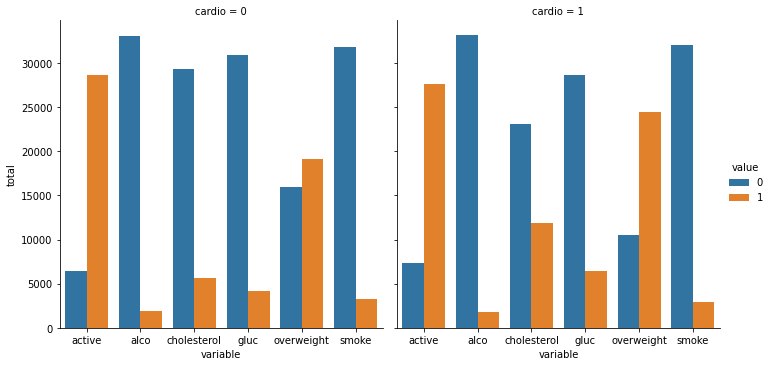

In [8]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat['total'] = 1
grouped_df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()
#grouped_df_cat
fig = sns.catplot(x='variable', hue='value', col='cardio', data=grouped_df_cat, kind='bar', y='total')
fig

In [23]:
df_heat = df[
             (df['ap_lo'] <= df['ap_hi'])
             & (df['height'] <= df['height'].quantile(0.975))
             & (df['height'] >= df['height'].quantile(0.025))
             & (df['weight'] <= df['weight'].quantile(0.975))
             & (df['weight'] >= df['weight'].quantile(0.025))
]
corr = df_heat.corr()

In [25]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

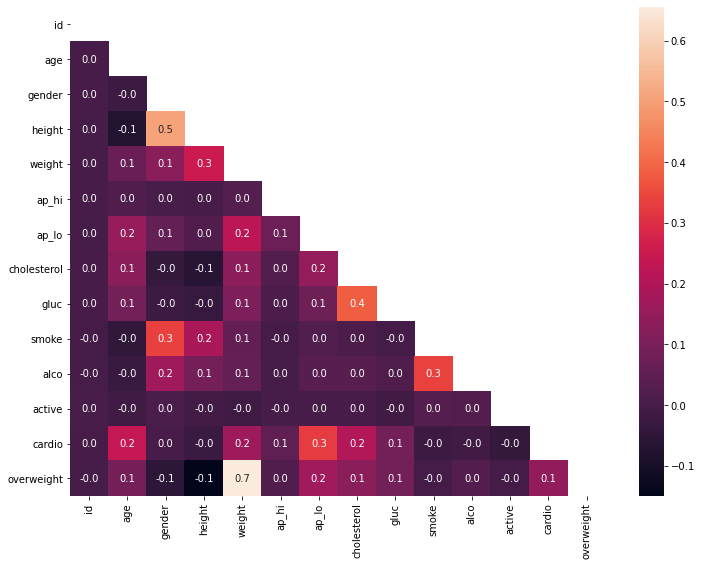

In [30]:
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.heatmap(corr, mask=mask, fmt=".1f", annot=True)
plt.show()